<a href="https://colab.research.google.com/github/exord/UNSAM_IA/blob/master/12_MDN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from math import *
from matplotlib import pylab as plt

from tensorflow import keras
%matplotlib inline
%load_ext tensorboard

# Mixture Density Networks (MDN)
<a id='mixtures'></a>

## Un sencillo problema de regresión...

Cuando estudiamos regresión lineal, vimos que el error cuadrático aparecía naturalmente al suponer que la distribución condicional de los labels era normal:

$$
p(t|x, \mathbf{w}, \beta) = \mathcal{N}(t|y(x,\mathbf{w}), \beta^{-1})\;\;.
$$

En ese caso, teníamos que el logaritmo de la versosimilitud de una serie de mediciones, $\mathbf{X} = \{\mathbf{x}_1, \ldots, \mathbf{x}_N\}$, con labels / outputs, $\mathbf{t} = \{t_1, \ldots, t_N\}$ era:

$$
\begin{array}{rcl}
\ln p(\mathbf{t}|\mathbf{w}, \beta) &=& \sum_{n=1}^N \ln\mathcal{N}(t_n|y(\mathbf{x},\mathbf{w}), \beta^{-1})\\
&=& \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi) - \beta E_D(\mathbf{w})\;\;,
\end{array}
$$
donde 
$$
E_D(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N\left\{t_n - \mathbf{w}^T\phi(\mathbf{x}_n)\right\}^2 \;\;.
$$

En el marco de los modelos de redes neuronales, las funciones de base $\phi$ se parametrizan para darle mayor flexibilidad al modelo, como estuvimos viendo estas semanas. 

Muy bien, veamos entonces qué pueden hacer las redes neuronales frente a un problema sencillo de regresión, con un output y un input. Seguimos de cerca a Bishop.

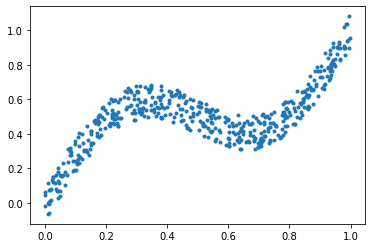

In [3]:
# Fix seed
np.random.seed(20200616)

# Create dataset
x = np.random.rand(600).reshape(-1, 1)
t = 1.0 * x + 0.3 * np.sin(2 * np.pi * x)

noise = (np.random.rand(x.shape[0]) * 0.2 - 0.1).reshape(-1, 1)

t += noise
# Separemos en train, test, y validation
X_train, X_validation, X_test = x[:500], x[500: 550], x[550:]
t_train, t_validation, t_test = t[:500], t[500: 550], t[550:]

# Veamos los datos
plt.plot(X_train, t_train, '.')

In [4]:
#
from tensorflow import keras

# Build simple DNN
modelo = keras.Sequential()

# Input layer
modelo.add(keras.layers.InputLayer(input_shape=X_train.shape[1:]))

# Agreguemos dos capas ocultas de 10 y 8 neuronas cada una
modelo.add(keras.layers.Dense(10, activation='sigmoid', name='Oculta1'))
modelo.add(keras.layers.Dense(8, activation='sigmoid', name='Oculta2'))

# Agregemos una capa de output que sirva para este problema
modelo.add(keras.layers.Dense(1, activation=None))

# keras.utils.plot_model(modelo, show_shapes=True)

In [5]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Oculta1 (Dense)              (None, 10)                20        
_________________________________________________________________
Oculta2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compilemos el modelo. 
# En este punto se elije la función de périda y el optimizador.
# ¿Qué función de pérdida deberíamos usar?
modelo.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.1))

In [7]:
# Es hora de entrenar el modelo. Corramos 500 épocas, y vayamos mirando también
# la validación.

# Usemos EarlyStopping para no pasar tiempo de más entrenando
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping
early = EarlyStopping(monitor='val_loss', min_delta=0.0, patience=50, verbose=0, 
                      mode='auto')

history = modelo.fit(X_train, t_train, epochs=200, 
                     validation_data=(X_validation, t_validation),)
                     #callbacks=[early,])

Epoch 1/200
16/16 [==============================] - 0s 18ms/step - loss: 0.1708 - val_loss: 0.0514
Epoch 2/200
16/16 [==============================] - 0s 8ms/step - loss: 0.0480 - val_loss: 0.0448
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0436
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0339 - val_loss: 0.0379
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0310 - val_loss: 0.0339
Epoch 6/200
16/16 [==============================] - 0s 13ms/step - loss: 0.0272 - val_loss: 0.0293
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.0249
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.0231
Epoch 9/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0229 - val_loss: 0.0226
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0228
Epoch 1

Epoch 83/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 84/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 85/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 86/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 87/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0062
Epoch 88/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.0049
Epoch 89/200
16/16 [==============================] - 0s 9ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 90/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 91/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 92/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0045


16/16 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 165/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 166/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 167/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 168/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 169/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 170/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 171/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0060
Epoch 172/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 173/200
16/16 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0053
Epoc

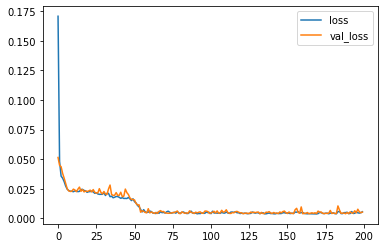

In [8]:
# Veamos el resultado del ajuste
import pandas as pd

df = pd.DataFrame(history.history)
df.plot()
ax = plt.gca()
# ax.set_ylim(0.01, 0.025)

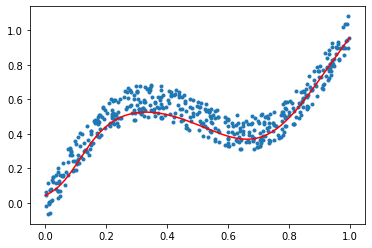

In [9]:
# Veamos los datos
plt.plot(X_train, t_train, '.')

# Graficamos la predicción del modelo 
xx = np.linspace(0, 1, 1000)
plt.plot(xx, modelo.predict(xx), '-r')

In [60]:
modelo.layers[-1].get_weights()

[array([[ 0.840226  ],
        [-0.15361215],
        [-0.2276728 ],
        [ 0.6442319 ],
        [-0.28225097],
        [-0.6305364 ],
        [-0.1584675 ],
        [-0.5493692 ]], dtype=float32),
 array([0.28338903], dtype=float32)]

In [13]:
# modelo.save('univariate_regression.h5')

Vemos que el modelo funciona bien (hay que prestar atención al learning rate, nomás).

## ... que de golpe se pone interesante.

Ahora veamos qué pasa si invertimos el rol de las variables, de manera que los datos que queremos ajustar son diferentes.

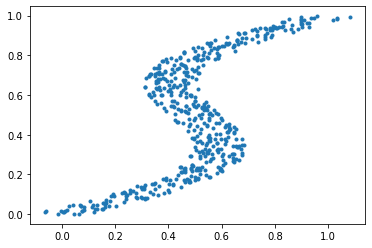

In [10]:
# Veamos los datos
plt.plot(t_train, X_train, '.')

In [11]:
# Escribamos un modelo similar al anterior (¿podemos usar el mismo modelo?)
# Build simple DNN
modelo2 = keras.Sequential()

# Input layer
modelo2.add(keras.layers.InputLayer(input_shape=t_train.shape[1:]))

# Agreguemos dos capas ocultas de 10 y 8 neuronas cada una
modelo2.add(keras.layers.Dense(10, activation='sigmoid', name='Oculta1_2'))
modelo2.add(keras.layers.Dense(8, activation='sigmoid', name='Oculta2_2'))

# Agregemos una capa de output que sirva para este problema
modelo2.add(keras.layers.Dense(1, activation=None))

In [12]:
# Compilemos, ajustemos, miremos el resultado y grafiquemos la predicción.
modelo2.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.1))

# keras.utils.plot_model(modelo2, show_shapes=True)

In [13]:
# OJO! OJO! En el validation_data, tiene que ir una tupla (no una lista!); 
# es decir, paréntesis y no corchetes
history2 = modelo2.fit(t_train, X_train, epochs=500, 
                       validation_data=(t_validation, X_validation))

# También se puede pasar una fracción del conjunto de entrenamiento para usar
# como validación.
# modelo2.fit(t_train, X_train, epochs=50, validation_split=0.1)

Epoch 1/500
16/16 [==============================] - 0s 15ms/step - loss: 0.1353 - val_loss: 0.1000
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0908 - val_loss: 0.0799
Epoch 3/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0722 - val_loss: 0.0755
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0648 - val_loss: 0.0546
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0544 - val_loss: 0.0507
Epoch 6/500
16/16 [==============================] - 0s 7ms/step - loss: 0.0520 - val_loss: 0.0477
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0532 - val_loss: 0.0536
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0520 - val_loss: 0.0498
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0551 - val_loss: 0.0485
Epoch 10/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0533 - val_loss: 0.0481
Epoch 11

16/16 [==============================] - 0s 5ms/step - loss: 0.0549 - val_loss: 0.0502
Epoch 84/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0514 - val_loss: 0.0523
Epoch 85/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0486 - val_loss: 0.0451
Epoch 86/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.0628
Epoch 87/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0559 - val_loss: 0.0457
Epoch 88/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0476 - val_loss: 0.0452
Epoch 89/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.0459
Epoch 90/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.0448
Epoch 91/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0461 - val_loss: 0.0449
Epoch 92/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0458 - val_loss: 0.0445
Epoch 93/500


16/16 [==============================] - 0s 7ms/step - loss: 0.0435 - val_loss: 0.0461
Epoch 165/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0422 - val_loss: 0.0465
Epoch 166/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0419 - val_loss: 0.0459
Epoch 167/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0436 - val_loss: 0.0483
Epoch 168/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0473 - val_loss: 0.0474
Epoch 169/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0436 - val_loss: 0.0498
Epoch 170/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0481 - val_loss: 0.0595
Epoch 171/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.0455
Epoch 172/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0428 - val_loss: 0.0464
Epoch 173/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0455 - val_loss: 0.0570
Epoc

16/16 [==============================] - 0s 5ms/step - loss: 0.0423 - val_loss: 0.0460
Epoch 246/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0421 - val_loss: 0.0473
Epoch 247/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0417 - val_loss: 0.0473
Epoch 248/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0431 - val_loss: 0.0470
Epoch 249/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0425 - val_loss: 0.0477
Epoch 250/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0464 - val_loss: 0.0458
Epoch 251/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0436 - val_loss: 0.0573
Epoch 252/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0461 - val_loss: 0.0466
Epoch 253/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0419 - val_loss: 0.0451
Epoch 254/500
16/16 [==============================] - 0s 7ms/step - loss: 0.0415 - val_loss: 0.0455
Epoc

16/16 [==============================] - 0s 5ms/step - loss: 0.0421 - val_loss: 0.0484
Epoch 327/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0425 - val_loss: 0.0468
Epoch 328/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0432 - val_loss: 0.0474
Epoch 329/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0438 - val_loss: 0.0565
Epoch 330/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0468 - val_loss: 0.0472
Epoch 331/500
16/16 [==============================] - 0s 10ms/step - loss: 0.0421 - val_loss: 0.0450
Epoch 332/500
16/16 [==============================] - 0s 7ms/step - loss: 0.0411 - val_loss: 0.0486
Epoch 333/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0423 - val_loss: 0.0471
Epoch 334/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0418 - val_loss: 0.0460
Epoch 335/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0408 - val_loss: 0.0474
Epo

16/16 [==============================] - 0s 6ms/step - loss: 0.0420 - val_loss: 0.0489
Epoch 408/500
16/16 [==============================] - ETA: 0s - loss: 0.041 - 0s 6ms/step - loss: 0.0413 - val_loss: 0.0455
Epoch 409/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0416 - val_loss: 0.0450
Epoch 410/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 0.0462
Epoch 411/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0431 - val_loss: 0.0505
Epoch 412/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0429 - val_loss: 0.0475
Epoch 413/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0470 - val_loss: 0.0718
Epoch 414/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0508 - val_loss: 0.0510
Epoch 415/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0424 - val_loss: 0.0452
Epoch 416/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0419

16/16 [==============================] - 0s 7ms/step - loss: 0.0446 - val_loss: 0.0448
Epoch 489/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0425 - val_loss: 0.0490
Epoch 490/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0423 - val_loss: 0.0447
Epoch 491/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0428 - val_loss: 0.0478
Epoch 492/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0443 - val_loss: 0.0544
Epoch 493/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0431 - val_loss: 0.0450
Epoch 494/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0449 - val_loss: 0.0458
Epoch 495/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0431 - val_loss: 0.0464
Epoch 496/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0422 - val_loss: 0.0449
Epoch 497/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0413 - val_loss: 0.0476
Epoc

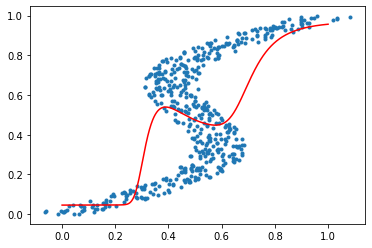

In [14]:
plt.plot(t_train, X_train, '.')

plt.plot(xx, modelo2.predict(xx), 'r-')

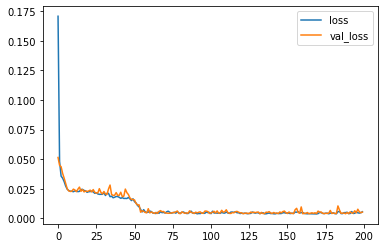

In [15]:
# Veamos el resultado del ajuste
import pandas as pd

df = pd.DataFrame(history.history)
df.plot()
ax = plt.gca()
# ax.set_ylim(0.01, 0.025)